# Baseline

In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных

In [11]:
train_df = pd.read_parquet("/kaggle/input/alphadataset/train_data.pqt")
test_df = pd.read_parquet("/kaggle/input/alphadataset/test_data.pqt")

In [12]:
train_df.head(3)

,id,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,...,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,start_cluster,end_cluster
0,0,month_1,0.744845,0.705492,1.287207,0.748101,channel_code_5,city_23,city_type_0,index_city_code_39,...,0.951166,0.568681,0.897565,0.553624,0.774354,0.936506,0.295984,0.967947,"{α, γ}",{other}
1,0,month_2,1.049605,0.831916,2.458609,1.053805,channel_code_5,city_23,city_type_0,index_city_code_39,...,0.948812,0.499716,0.785029,0.551904,0.696576,0.990157,0.298873,0.945969,"{α, γ}",{other}
2,0,month_3,0.692653,0.740253,0.430042,0.695747,channel_code_5,city_23,city_type_0,index_city_code_39,...,0.946458,0.442244,0.877050,0.551044,0.663243,0.810065,0.294829,0.956958,"{α, γ}",{other}


In [13]:
test_df.head(3)

,id,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,...,sum_cred_g_oper_3m,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,start_cluster
0,200000,month_4,-0.096224,0.335496,-0.125995,-0.095578,channel_code_12,city_14,city_type_0,None,...,0.010952,0.946066,0.407762,-0.153950,0.548895,0.541020,0.031742,0.257278,0.561353,{α}
1,200000,month_5,-0.024255,-0.059806,-0.124295,-0.023381,channel_code_12,city_14,city_type_0,None,...,0.006812,0.945281,0.396267,-0.150505,0.549468,0.552131,0.237817,0.264211,0.715199,{α}
2,200000,month_6,0.045988,0.049418,-0.125995,0.047079,channel_code_12,city_14,city_type_0,None,...,0.006812,0.945281,0.396267,-0.152800,0.549468,0.541020,0.387566,0.268543,0.836079,None


In [14]:
cat_cols = [
    "channel_code", "city", "city_type",
    "okved", "segment", "start_cluster",
    "index_city_code", "ogrn_month", "ogrn_year"
]

In [15]:
non_cat_cols = train_df.drop(cat_cols, axis=1)

In [16]:
test_df

,id,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,...,sum_cred_g_oper_3m,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,start_cluster
0,200000,month_4,-0.096224,0.335496,-0.125995,-0.095578,channel_code_12,city_14,city_type_0,None,...,0.010952,0.946066,0.407762,-0.153950,0.548895,0.541020,0.031742,0.257278,0.561353,{α}
1,200000,month_5,-0.024255,-0.059806,-0.124295,-0.023381,channel_code_12,city_14,city_type_0,None,...,0.006812,0.945281,0.396267,-0.150505,0.549468,0.552131,0.237817,0.264211,0.715199,{α}
2,200000,month_6,0.045988,0.049418,-0.125995,0.047079,channel_code_12,city_14,city_type_0,None,...,0.006812,0.945281,0.396267,-0.152800,0.549468,0.541020,0.387566,0.268543,0.836079,None
3,200001,month_4,-0.156722,-0.204920,-0.125856,-0.156258,channel_code_9,city_76,city_type_0,None,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{α}
4,200001,month_5,-0.156722,-0.204920,-0.125856,-0.156258,channel_code_9,city_76,city_type_0,None,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{α}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290115,299998,month_5,NaN,NaN,NaN,NaN,None,None,None,None,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{}
290116,299998,month_6,-0.155350,-0.203711,-0.125995,-0.155980,channel_code_9,city_25,city_type_0,index_city_code_30,...,-0.028584,0.944497,0.384773,-0.165588,0.546889,0.407687,-0.201123,0.250924,0.374540,None
290117,299999,month_4,-0.145899,-0.173298,-0.125995,-0.145402,channel_code_9,city_6,city_type_0,index_city_code_34,...,-0.028584,0.944497,0.384773,-0.097640,0.550901,0.574354,-0.101369,0.252657,0.440474,{α}
290118,299999,month_5,-0.136402,-0.163874,-0.121475,-0.135876,channel_code_9,city_6,city_type_0,index_city_code_34,...,-0.028584,0.944497,0.384773,-0.047885,0.555057,0.696576,-0.034860,0.253523,0.473441,{α}


Обозначение категориальных признаков

In [17]:
train_df[cat_cols] = train_df[cat_cols].astype("str")
test_df[cat_cols] = test_df[cat_cols].astype("str")

Создаем выборки для валидации и обучения

Оставляем только 3 месяц, данные за 1 и 2 месяца добаляем как новые столбцы

In [18]:
# Фильтрация данных, оставляем только записи за последний месяц
last_month_df = train_df[train_df['date'] == 'month_3']

# Создание DataFrame для данных за предыдущие два месяца
prev_month_2_df = train_df[train_df['date'] == 'month_2'].set_index('id')
prev_month_1_df = train_df[train_df['date'] == 'month_1'].set_index('id')
prev_month_2_df[cat_cols] = prev_month_2_df[cat_cols].astype("category")
prev_month_1_df[cat_cols] = prev_month_1_df[cat_cols].astype("category")
# Переименование столбцов, чтобы избежать конфликтов имен
prev_month_2_df.columns = [f'{col}_prev_month_2' for col in prev_month_2_df.columns]
prev_month_1_df.columns = [f'{col}_prev_month_1' for col in prev_month_1_df.columns]
# Объединение данных за предыдущие месяцы
prev_months_combined = prev_month_2_df.join(prev_month_1_df, how='outer')
# Объединение данных за последний месяц с данными за предыдущие месяцы
final_df = last_month_df.set_index('id').join(prev_months_combined, how='left')
# Вывод результата
final_df

,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,ogrn_days_end_month,...,cnt_cred_g_oper_3m_prev_month_1,cnt_days_cred_g_oper_3m_prev_month_1,sum_deb_h_oper_3m_prev_month_1,cnt_deb_h_oper_3m_prev_month_1,cnt_days_deb_h_oper_3m_prev_month_1,sum_cred_h_oper_3m_prev_month_1,cnt_cred_h_oper_3m_prev_month_1,cnt_days_cred_h_oper_3m_prev_month_1,start_cluster_prev_month_1,end_cluster_prev_month_1
id,,,,,,,,,,,,,,,,,,,,,
0,month_3,0.692653,0.740253,0.430042,0.695747,channel_code_5,city_23,city_type_0,index_city_code_39,-0.488553,...,0.951166,0.568681,0.897565,0.553624,0.774354,0.936506,0.295984,0.967947,"{α, γ}",{other}
1,month_3,-0.090605,-0.114275,-0.114119,-0.089937,channel_code_2,city_14,city_type_0,None,0.324343,...,0.945281,0.407762,0.369318,0.567093,0.785465,-0.184002,0.253523,0.462452,{other},{other}
2,month_3,-0.148737,-0.187003,-0.112416,-0.148249,channel_code_12,city_613,city_type_306,None,-0.256297,...,0.944497,0.384773,-0.165588,0.546889,0.407687,-0.178674,0.252657,0.440474,{α},{α}
3,month_3,-0.156522,-0.204718,-0.125759,-0.156058,channel_code_14,city_21,city_type_0,index_city_code_46,-1.185321,...,0.944497,0.384773,-0.165588,0.546889,0.407687,-0.201123,0.250924,0.374540,{α},{α}
4,month_3,-0.141798,-0.170262,-0.125672,-0.141289,channel_code_8,city_21,city_type_0,None,-1.417577,...,0.957443,0.672129,-0.078233,0.558209,0.707687,-0.178408,0.252946,0.440474,{α},{α}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,month_3,-0.039281,-0.053694,-0.044193,-0.038454,channel_code_9,city_20,city_type_0,index_city_code_28,1.601751,...,0.944497,0.384773,-0.161095,0.547319,0.429909,-0.201123,0.250924,0.374540,"{α, η}",{other}
199996,month_3,0.293117,0.189316,0.857952,0.294974,channel_code_14,city_3595,city_type_2778,index_city_code_48,-0.953065,...,0.944889,0.396267,-0.151699,0.553767,0.574354,-0.201123,0.250924,0.374540,"{α, γ}","{α, γ}"
199997,month_3,0.032941,0.140726,-0.125362,0.033992,channel_code_8,city_0,city_type_0,index_city_code_58,1.485623,...,0.944889,0.396267,1.185234,0.571535,0.918798,0.955885,0.264788,0.693221,{other},{other}


In [19]:
final_df['start_cluster_prev_month_1']

id
0          {α, γ}
1         {other}
2             {α}
3             {α}
4             {α}
           ...   
199995     {α, η}
199996     {α, γ}
199997    {other}
199998         {}
199999         {}
Name: start_cluster_prev_month_1, Length: 200000, dtype: category
Categories (17, object): ['{other}', '{}', '{α, β}', '{α, γ}', ..., '{α, π}', '{α, ψ}', '{α}', '{λ}']

In [20]:
#clusters = ['start_cluster_prev_month_1','start_cluster_prev_month_2','end_cluster_prev_month_1','end_cluster_prev_month_2']
#final_df[clusters] = final_df[clusters].astype('category')

Добавим новые категориальные столбцы в cat_cols

In [21]:
# Функция для добавления новых слов в названия столбцов
def add_word(cols, suffix):
    return [col + suffix for col in cols]

# Добавление"_prev_month_2" и "_prev_month_1"
new_cat_cols = add_word(cat_cols, "_prev_month_2") + add_word(cat_cols, "_prev_month_1")
cat_cols += new_cat_cols

print(cat_cols)

['channel_code', 'city', 'city_type', 'okved', 'segment', 'start_cluster', 'index_city_code', 'ogrn_month', 'ogrn_year', 'channel_code_prev_month_2', 'city_prev_month_2', 'city_type_prev_month_2', 'okved_prev_month_2', 'segment_prev_month_2', 'start_cluster_prev_month_2', 'index_city_code_prev_month_2', 'ogrn_month_prev_month_2', 'ogrn_year_prev_month_2', 'channel_code_prev_month_1', 'city_prev_month_1', 'city_type_prev_month_1', 'okved_prev_month_1', 'segment_prev_month_1', 'start_cluster_prev_month_1', 'index_city_code_prev_month_1', 'ogrn_month_prev_month_1', 'ogrn_year_prev_month_1']


In [22]:
X = final_df.drop(["date", "end_cluster",'date_prev_month_1','date_prev_month_2','end_cluster_prev_month_1','end_cluster_prev_month_2'], axis=1)
y = final_df["end_cluster"]

x_train, x_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                   random_state=42)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Распределение целевой переменной')]

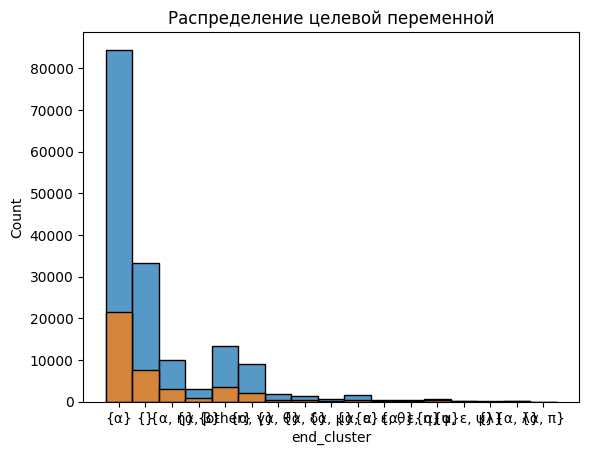

In [23]:
sns.histplot(y_train)
sns.histplot(y_val).set(title='Распределение целевой переменной')

In [24]:
zero_importance = ['city_type',
 'cnt_cred_d_oper_1m',
 'sum_deb_d_oper_3m',
 'cnt_deb_d_oper_3m',
 'sum_cred_d_oper_3m',
 'cnt_days_cred_f_oper_3m',
 'cnt_days_cred_g_oper_3m',
 'cnt_cred_h_oper_3m',
 'city_prev_month_2',
 'city_type_prev_month_2',
 'ogrn_days_end_quarter_prev_month_2',
 'sum_of_paym_2m_prev_month_2',
 'cnt_b_oper_1m_prev_month_2',
 'cnt_days_cred_f_oper_1m_prev_month_2',
 'cnt_deb_g_oper_1m_prev_month_2',
 'cnt_days_cred_g_oper_1m_prev_month_2',
 'cnt_deb_h_oper_1m_prev_month_2',
 'cnt_cred_h_oper_1m_prev_month_2',
 'cnt_days_cred_h_oper_1m_prev_month_2',
 'sum_b_oper_3m_prev_month_2',
 'sum_cred_d_oper_3m_prev_month_2',
 'cnt_cred_d_oper_3m_prev_month_2',
 'sum_cred_f_oper_3m_prev_month_2',
 'cnt_days_cred_f_oper_3m_prev_month_2',
 'cnt_deb_g_oper_3m_prev_month_2',
 'cnt_cred_g_oper_3m_prev_month_2',
 'city_type_prev_month_1',
 'sum_a_oper_1m_prev_month_1',
 'cnt_b_oper_1m_prev_month_1',
 'sum_cred_d_oper_1m_prev_month_1',
 'cnt_cred_e_oper_1m_prev_month_1',
 'cnt_days_deb_f_oper_1m_prev_month_1',
 'cnt_days_cred_f_oper_1m_prev_month_1',
 'cnt_deb_g_oper_1m_prev_month_1',
 'cnt_days_deb_g_oper_1m_prev_month_1',
 'sum_cred_g_oper_1m_prev_month_1',
 'cnt_days_cred_h_oper_1m_prev_month_1',
 'cnt_deb_d_oper_3m_prev_month_1',
 'sum_cred_d_oper_3m_prev_month_1',
 'cnt_cred_f_oper_3m_prev_month_1']

In [25]:
cat_cols_to_remove = (list(set(zero_importance) & set(cat_cols)))
cat_cols_to_remove

['city_type',
 'city_type_prev_month_2',
 'city_prev_month_2',
 'city_type_prev_month_1']

## Обучение модели

В качестве базовой модели возьмем Catboost обучим на всех признаках

In [26]:
from catboost import CatBoostClassifier, cv, Pool

Зададим функцию для взвешенной метрики roc auc

In [27]:
def weighted_roc_auc(y_true, y_pred, labels, weights_dict):
    unnorm_weights = np.array([weights_dict[label] for label in labels])
    weights = unnorm_weights / unnorm_weights.sum()
    classes_roc_auc = roc_auc_score(y_true, y_pred, labels=labels,
                                    multi_class="ovr")#, average=None)
    return sum(weights * classes_roc_auc)

In [28]:
cluster_weights = pd.read_excel("/kaggle/input/alphadataset/cluster_weights.xlsx").set_index("cluster")
weights_dict = cluster_weights["unnorm_weight"].to_dict()

Проверка работы модели

Построение предварительной моели и отбор значимых признаков

In [29]:
catboost_params = {
    'iterations': 270,
    'learning_rate': 0.1,
    'depth': 6,
    'loss_function': 'MultiClass',
    'task_type': 'GPU',  # Specify GPU usage
    'random_seed': 42
}

# Create CatBoost classifier
model0 = CatBoostClassifier(**catboost_params)

In [30]:
model0.fit(x_train, y_train,eval_set=(x_val, y_val), cat_features=cat_cols, verbose=10)

0:	learn: 2.0679609	test: 2.0111879	best: 2.0111879 (0)	total: 181ms	remaining: 48.6s
10:	learn: 1.1336773	test: 1.0502241	best: 1.0502241 (10)	total: 590ms	remaining: 13.9s
20:	learn: 0.9586281	test: 0.8746042	best: 0.8746042 (20)	total: 1.03s	remaining: 12.2s
30:	learn: 0.8976774	test: 0.8157277	best: 0.8157277 (30)	total: 1.45s	remaining: 11.2s
40:	learn: 0.8719629	test: 0.7924555	best: 0.7924555 (40)	total: 1.85s	remaining: 10.4s
50:	learn: 0.8582988	test: 0.7815502	best: 0.7815502 (50)	total: 2.26s	remaining: 9.7s
60:	learn: 0.8497019	test: 0.7750616	best: 0.7750616 (60)	total: 2.66s	remaining: 9.1s
70:	learn: 0.8420153	test: 0.7694171	best: 0.7694171 (70)	total: 3.06s	remaining: 8.57s
80:	learn: 0.8365429	test: 0.7656403	best: 0.7656403 (80)	total: 3.46s	remaining: 8.07s
90:	learn: 0.8313602	test: 0.7623054	best: 0.7623054 (90)	total: 3.86s	remaining: 7.6s
100:	learn: 0.8268120	test: 0.7600587	best: 0.7600587 (100)	total: 4.27s	remaining: 7.15s
110:	learn: 0.8233406	test: 0.75835

In [31]:
y_pred_proba_train0 = model0.predict_proba(x_train)
weighted_roc_auc(y_train, y_pred_proba_train0, model0.classes_, weights_dict)

0.9394963075660301

In [32]:
y_pred_proba0 = model0.predict_proba(x_val)
weighted_roc_auc(y_val, y_pred_proba0, model0.classes_, weights_dict)

0.9006999095390955

In [33]:
feature_importances = pd.DataFrame(zip(x_train.columns, model0.feature_importances_))
feature_importances.columns = ['feature name', 'importance']
feature_importances

,feature name,importance
0,balance_amt_avg,1.055841
1,balance_amt_max,1.570270
2,balance_amt_min,2.708236
3,balance_amt_day_avg,1.813383
4,channel_code,1.870618
...,...,...
265,cnt_days_deb_h_oper_3m_prev_month_1,0.062197
266,sum_cred_h_oper_3m_prev_month_1,0.170265
267,cnt_cred_h_oper_3m_prev_month_1,0.108095
268,cnt_days_cred_h_oper_3m_prev_month_1,0.046857


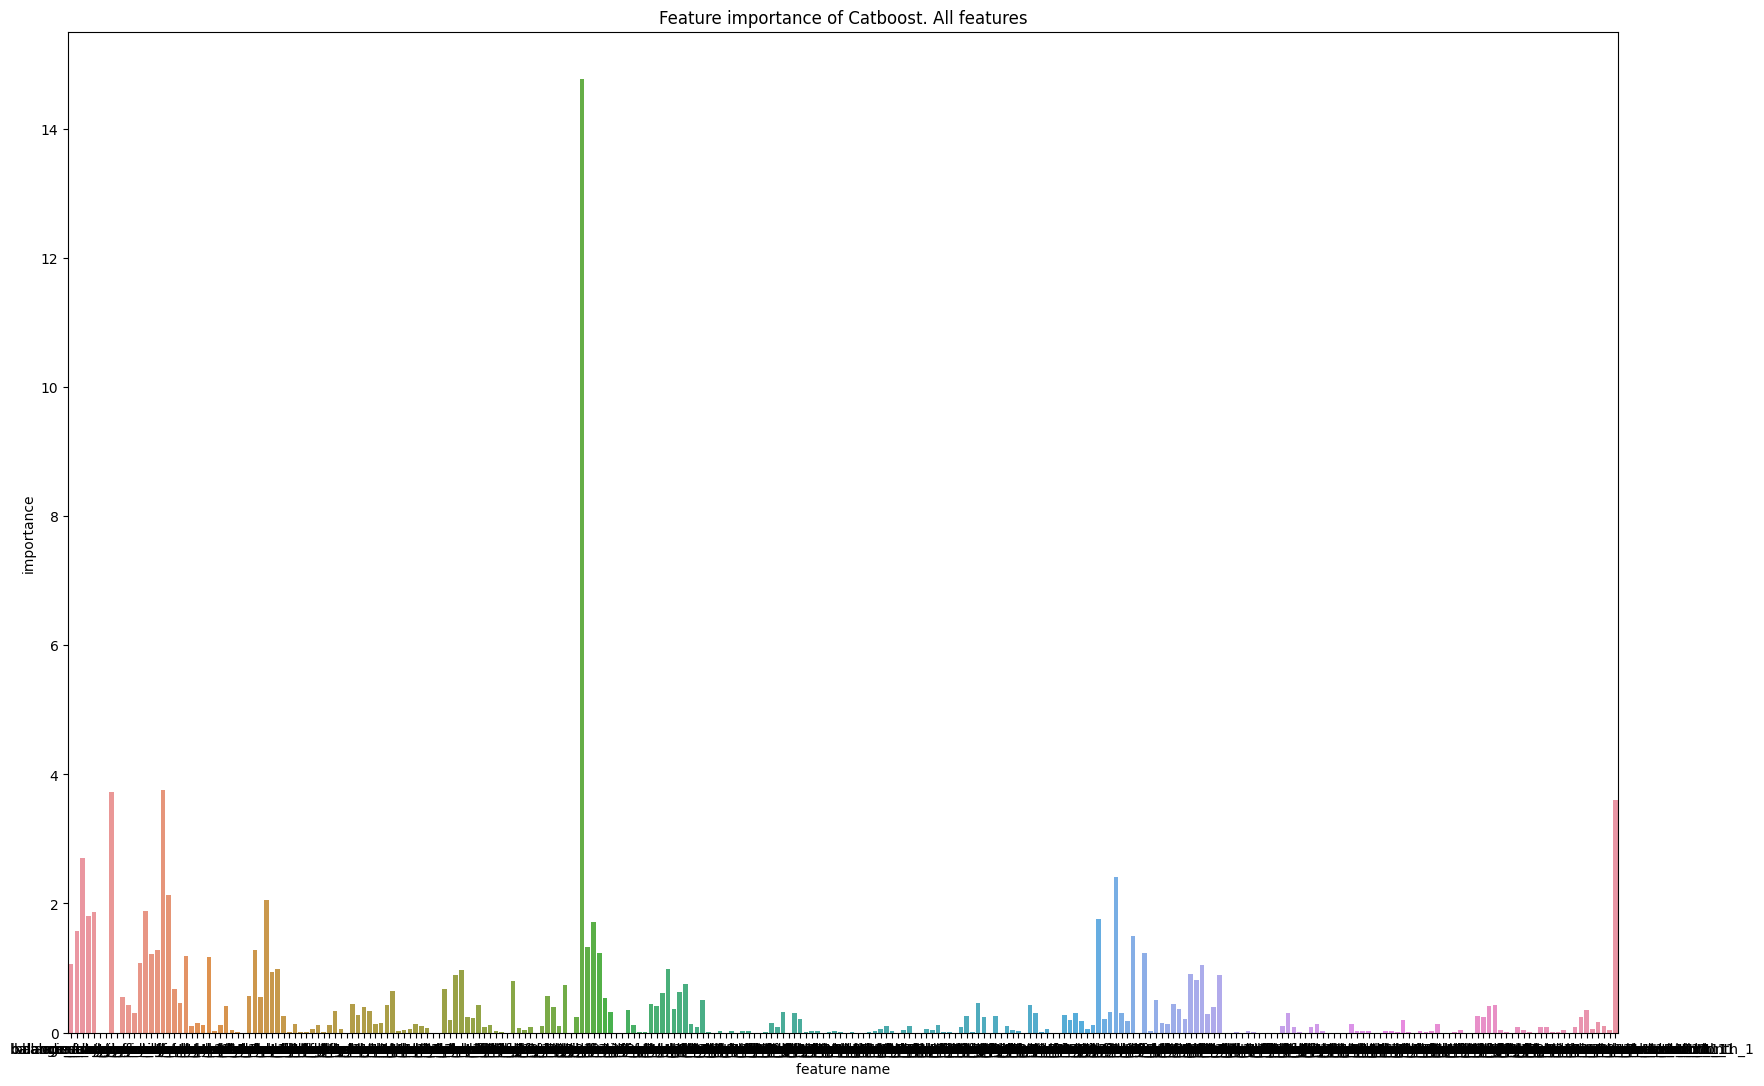

In [34]:
figure, ax = plt.subplots(figsize=(20, 13))
sns.barplot(x = feature_importances['feature name'], y=feature_importances['importance'], ax=ax)
plt.title('Feature importance of Catboost. All features')
plt.show()

In [35]:
not_important = feature_importances[feature_importances['importance'] > 1.5]
not_important

,feature name,importance
1,balance_amt_max,1.570270
2,balance_amt_min,2.708236
3,balance_amt_day_avg,1.813383
4,channel_code,1.870618
7,index_city_code,3.722628
13,max_founderpres,1.880490
16,okved,3.761516
17,segment,2.134525
34,sum_cred_e_oper_1m,2.055826
89,start_cluster,14.766168


In [36]:
not_important = feature_importances[feature_importances['importance'] == 0]
not_important

,feature name,importance
5,city,0.0
6,city_type,0.0
8,ogrn_days_end_month,0.0
30,cnt_cred_d_oper_1m,0.0
63,sum_cred_d_oper_3m,0.0
64,cnt_cred_d_oper_3m,0.0
87,cnt_cred_h_oper_3m,0.0
95,city_prev_month_2,0.0
96,city_type_prev_month_2,0.0
120,cnt_cred_d_oper_1m_prev_month_2,0.0


In [37]:
non_important_cols = not_important['feature name'].tolist()
print(non_important_cols)

['city', 'city_type', 'ogrn_days_end_month', 'cnt_cred_d_oper_1m', 'sum_cred_d_oper_3m', 'cnt_cred_d_oper_3m', 'cnt_cred_h_oper_3m', 'city_prev_month_2', 'city_type_prev_month_2', 'cnt_cred_d_oper_1m_prev_month_2', 'cnt_cred_e_oper_1m_prev_month_2', 'cnt_cred_f_oper_1m_prev_month_2', 'cnt_days_deb_g_oper_1m_prev_month_2', 'cnt_cred_g_oper_1m_prev_month_2', 'cnt_days_cred_g_oper_1m_prev_month_2', 'sum_b_oper_3m_prev_month_2', 'cnt_cred_d_oper_3m_prev_month_2', 'cnt_days_cred_e_oper_3m_prev_month_2', 'cnt_deb_f_oper_3m_prev_month_2', 'cnt_days_cred_f_oper_3m_prev_month_2', 'cnt_cred_g_oper_3m_prev_month_2', 'cnt_days_cred_g_oper_3m_prev_month_2', 'city_type_prev_month_1', 'sum_deb_d_oper_1m_prev_month_1', 'cnt_deb_d_oper_1m_prev_month_1', 'sum_cred_d_oper_1m_prev_month_1', 'cnt_cred_e_oper_1m_prev_month_1', 'cnt_days_deb_f_oper_1m_prev_month_1', 'cnt_days_cred_g_oper_1m_prev_month_1', 'cnt_days_cred_h_oper_1m_prev_month_1', 'sum_c_oper_3m_prev_month_1', 'sum_cred_d_oper_3m_prev_month_1',

In [38]:
cat_cols_to_remove = (list(set(non_important_cols) & set(cat_cols)))
print(cat_cols_to_remove)

['city', 'city_type_prev_month_2', 'city_prev_month_2', 'city_type_prev_month_1', 'city_type']


In [39]:
X = X.drop(non_important_cols, axis=1)
cat_cols = list(set(cat_cols).difference(cat_cols_to_remove))
y = final_df["end_cluster"]
x_train, x_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                   random_state=42)

**Модель c подобранными параметрами весов**

In [40]:
cv_dataset = Pool(data=X,
                  label=y,
                  cat_features=cat_cols)

In [41]:
catboost_params = {
    'iterations': 1500,
    'learning_rate': 0.1,
    'depth': 6,
    'loss_function': 'MultiClass',
    'task_type': 'GPU',  # Specify GPU usage
    'random_seed': 42,
    'early_stopping_rounds': 10
}

In [42]:
model0 = cv(cv_dataset, params=catboost_params, fold_count=4, return_models=True)

Training on fold [0/4]
0:	learn: 2.0506582	test: 2.0504636	best: 2.0504636 (0)	total: 41ms	remaining: 1m 1s
1:	learn: 1.7996525	test: 1.7996720	best: 1.7996720 (1)	total: 78.4ms	remaining: 58.7s
2:	learn: 1.6349180	test: 1.6350122	best: 1.6350122 (2)	total: 116ms	remaining: 58s
3:	learn: 1.5148160	test: 1.5150206	best: 1.5150206 (3)	total: 154ms	remaining: 57.7s
4:	learn: 1.4208505	test: 1.4212760	best: 1.4212760 (4)	total: 193ms	remaining: 57.7s
5:	learn: 1.3460043	test: 1.3467219	best: 1.3467219 (5)	total: 232ms	remaining: 57.9s
6:	learn: 1.2844898	test: 1.2853733	best: 1.2853733 (6)	total: 270ms	remaining: 57.5s
7:	learn: 1.2310880	test: 1.2321549	best: 1.2321549 (7)	total: 308ms	remaining: 57.5s
8:	learn: 1.1876337	test: 1.1891113	best: 1.1891113 (8)	total: 347ms	remaining: 57.4s
9:	learn: 1.1488855	test: 1.1504149	best: 1.1504149 (9)	total: 386ms	remaining: 57.5s
10:	learn: 1.1164811	test: 1.1181770	best: 1.1181770 (10)	total: 425ms	remaining: 57.5s
11:	learn: 1.0875105	test: 1.08

In [43]:
model0 = CatBoostClassifier(**catboost_params)

In [44]:
catboost_params = {
    'iterations': 550,
    'learning_rate': 0.1,
    'depth': 6,
    'loss_function': 'MultiClass',
    'task_type': 'GPU',  # Specify GPU usage
    'random_seed': 42,
    'early_stopping_rounds': 10
}

In [45]:
model0.fit(X, y, cat_features=cat_cols, verbose=10)

0:	learn: 2.0498611	total: 44.6ms	remaining: 1m 6s
10:	learn: 1.1148137	total: 478ms	remaining: 1m 4s
20:	learn: 0.9398953	total: 945ms	remaining: 1m 6s
30:	learn: 0.8804764	total: 1.39s	remaining: 1m 5s
40:	learn: 0.8561931	total: 1.81s	remaining: 1m 4s
50:	learn: 0.8416445	total: 2.24s	remaining: 1m 3s
60:	learn: 0.8330235	total: 2.67s	remaining: 1m 2s
70:	learn: 0.8266825	total: 3.09s	remaining: 1m 2s
80:	learn: 0.8208462	total: 3.53s	remaining: 1m 1s
90:	learn: 0.8163877	total: 3.95s	remaining: 1m 1s
100:	learn: 0.8121180	total: 4.38s	remaining: 1m
110:	learn: 0.8089494	total: 4.79s	remaining: 59.9s
120:	learn: 0.8058938	total: 5.2s	remaining: 59.3s
130:	learn: 0.8028873	total: 5.62s	remaining: 58.8s
140:	learn: 0.8003956	total: 6.04s	remaining: 58.2s
150:	learn: 0.7974751	total: 6.46s	remaining: 57.7s
160:	learn: 0.7951960	total: 6.88s	remaining: 57.2s
170:	learn: 0.7928430	total: 7.3s	remaining: 56.7s
180:	learn: 0.7911166	total: 7.71s	remaining: 56.2s
190:	learn: 0.7893611	total

In [46]:
y_pred_proba_train0 = model0.predict_proba(x_train)
weighted_roc_auc(y_train, y_pred_proba_train0, model0.classes_, weights_dict)

0.9676258562622073

In [47]:
y_pred_proba0 = model0.predict_proba(x_val)
weighted_roc_auc(y_val, y_pred_proba0, model0.classes_, weights_dict)

0.9727638774314673

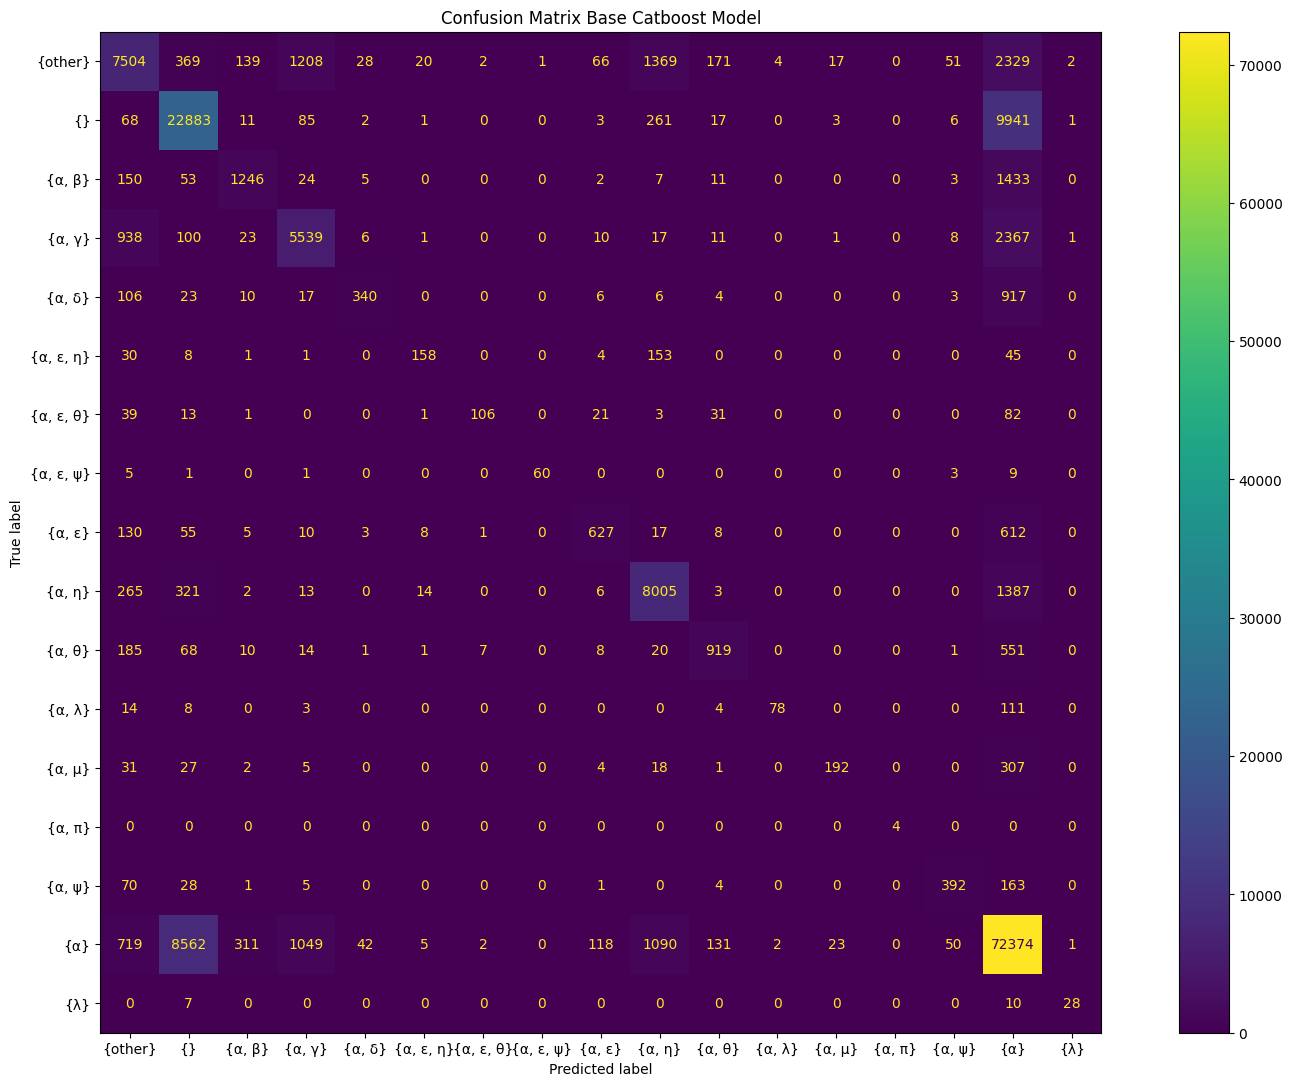

In [48]:
preds0 = model0.predict(x_train)
figure, ax = plt.subplots(figsize=(20, 13))
ConfusionMatrixDisplay.from_predictions(y_train, preds0, ax=ax)
plt.title('Confusion Matrix Base Catboost Model')
plt.show()

In [49]:
feature_importances = pd.DataFrame(zip(x_train.columns, model0.feature_importances_))
feature_importances.columns = ['feature name', 'importance']
feature_importances

,feature name,importance
0,balance_amt_avg,1.182936
1,balance_amt_max,1.781157
2,balance_amt_min,3.006943
3,balance_amt_day_avg,1.122719
4,channel_code,2.378617
...,...,...
230,cnt_days_deb_h_oper_3m_prev_month_1,0.166468
231,sum_cred_h_oper_3m_prev_month_1,0.193428
232,cnt_cred_h_oper_3m_prev_month_1,0.186897
233,cnt_days_cred_h_oper_3m_prev_month_1,0.191020


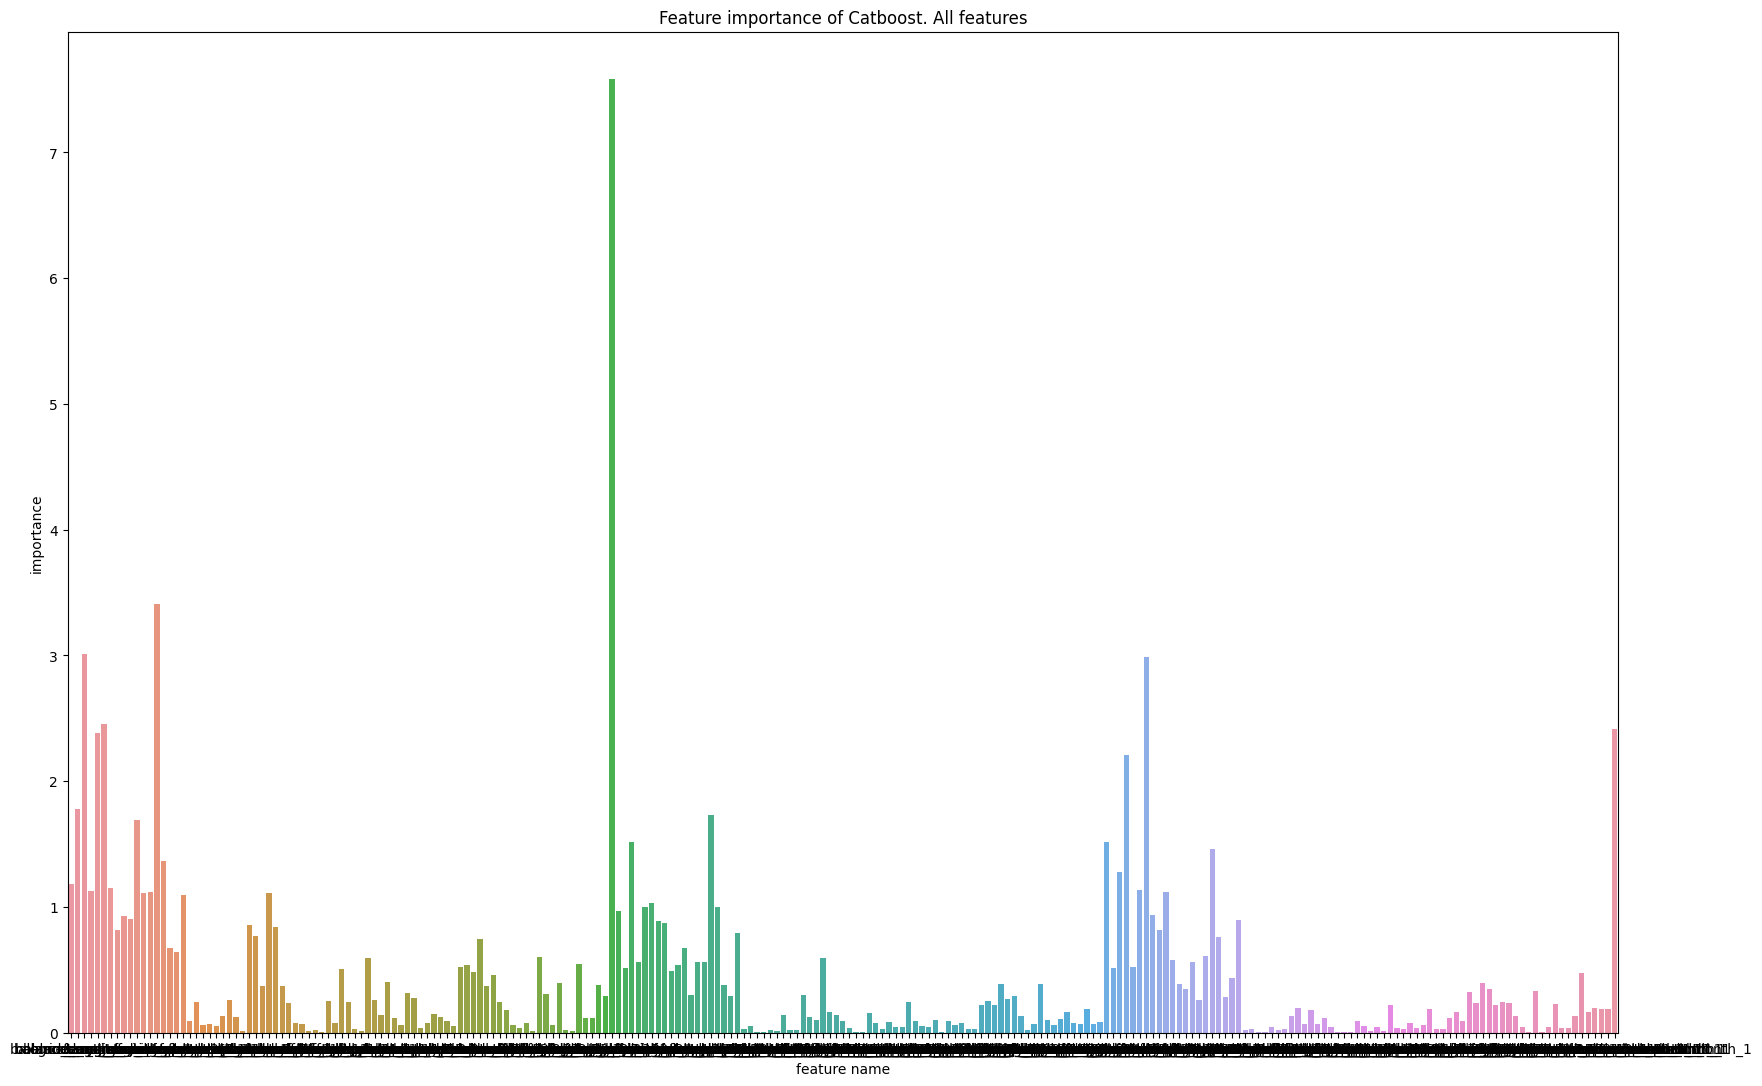

In [50]:
figure, ax = plt.subplots(figsize=(20, 13))
sns.barplot(x = feature_importances['feature name'], y=feature_importances['importance'], ax=ax)
plt.title('Feature importance of Catboost. All features')
plt.show()

In [51]:
very_important = feature_importances[feature_importances['importance'] > 1]

In [52]:
very_important

,feature name,importance
0,balance_amt_avg,1.182936
1,balance_amt_max,1.781157
2,balance_amt_min,3.006943
3,balance_amt_day_avg,1.122719
4,channel_code,2.378617
5,index_city_code,2.451829
6,ogrn_days_end_quarter,1.150294
10,max_founderpres,1.693542
11,min_founderpres,1.106680
12,ogrn_exist_months,1.120972


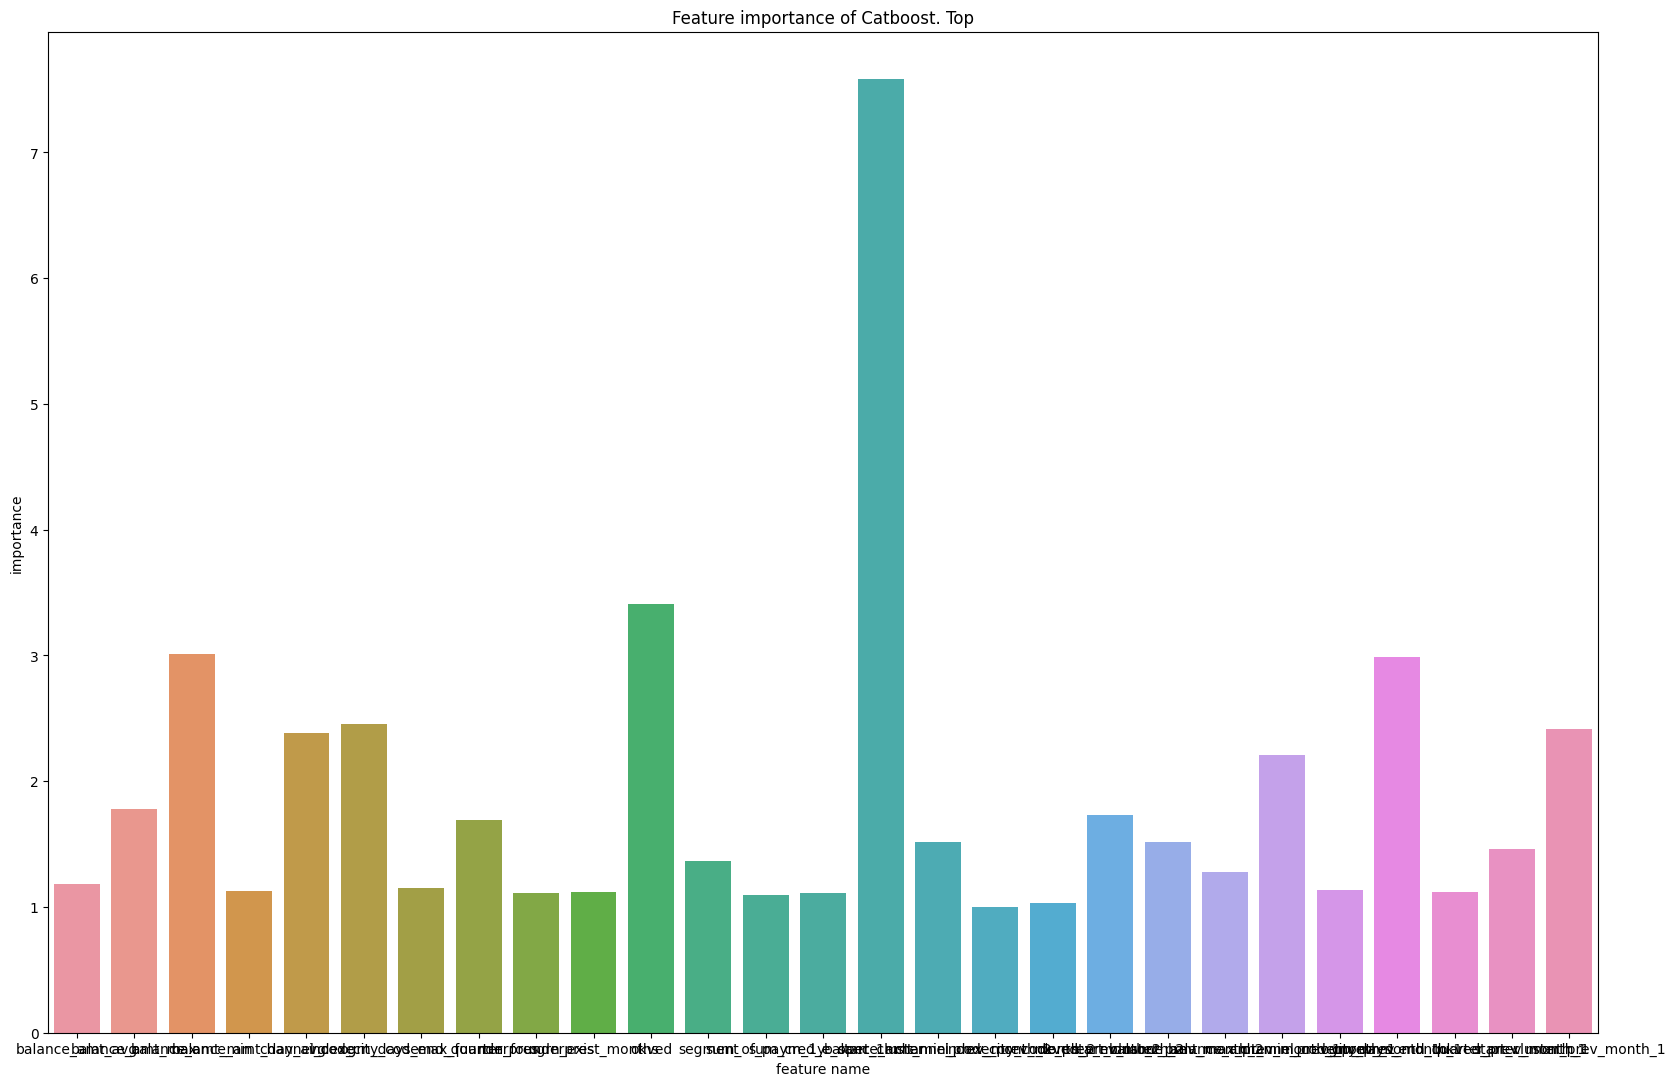

In [53]:
figure, ax = plt.subplots(figsize=(20, 13))
sns.barplot(x = very_important['feature name'], y=very_important['importance'], ax=ax)
plt.title('Feature importance of Catboost. Top')
plt.show()

In [54]:
X.iloc[0,:]

balance_amt_avg                               0.692653
balance_amt_max                               0.740253
balance_amt_min                               0.430042
balance_amt_day_avg                           0.695747
channel_code                            channel_code_5
                                             ...      
cnt_days_deb_h_oper_3m_prev_month_1           0.774354
sum_cred_h_oper_3m_prev_month_1               0.936506
cnt_cred_h_oper_3m_prev_month_1               0.295984
cnt_days_cred_h_oper_3m_prev_month_1          0.967947
start_cluster_prev_month_1                      {α, γ}
Name: 0, Length: 235, dtype: object

In [55]:
Xx = X.drop(cat_cols,axis=1)

In [56]:
import shap
explainer = shap.TreeExplainer(model0)

In [57]:
shap_values = explainer(X.iloc[1,:])

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


CatBoostError: Invalid cat_features[0] = 4 value: index must be < 1.

In [ ]:
shap.plots.force(shap_values[0, ...])

In [ ]:
#shap_values

In [ ]:
#shap.plots.beeswarm(shap_values[..., 0])

## Прогноз на тестовой выборке

In [ ]:
cat_cols = [
    "channel_code", "city", "city_type",
    "okved", "segment", "start_cluster",
    "index_city_code", "ogrn_month", "ogrn_year"
]

In [ ]:
# Фильтрация данных, оставляем только записи за последний месяц
last_month_df = test_df[test_df['date'] == 'month_6']

# Создание DataFrame для данных за предыдущие два месяца
prev_month_5_df = test_df[test_df['date'] == 'month_5'].set_index('id')
prev_month_4_df = test_df[test_df['date'] == 'month_4'].set_index('id')
prev_month_5_df[cat_cols] = prev_month_5_df[cat_cols].astype("category")
prev_month_4_df[cat_cols] = prev_month_4_df[cat_cols].astype("category")

# Переименование столбцов, чтобы избежать конфликтов имен
prev_month_5_df.columns = [f'{col}_prev_month_2' for col in prev_month_5_df.columns]
prev_month_4_df.columns = [f'{col}_prev_month_1' for col in prev_month_4_df.columns]

# Объединение данных за предыдущие месяцы
prev_months_combined = prev_month_5_df.join(prev_month_4_df, how='outer')

# Объединение данных за последний месяц с данными за предыдущие месяцы
final_df = last_month_df.set_index('id').join(prev_months_combined, how='left')

final_df


In [ ]:
test_df.pivot(index="id", columns="date", values="start_cluster").head(3)

In [ ]:
sample_submission_df = pd.read_csv("/kaggle/input/alphadataset/sample_submission.csv")

In [ ]:
sample_submission_df.shape

In [ ]:
sample_submission_df.head()

Для того, чтобы сделать прогноз на тестовой выборке, нужно заполнить стартовый кластер. </br>
Заполним все стартовые кластеры, значением за предыдущий(5) месяц.

In [ ]:
filtered_rows = test_df[test_df['date'] == 'month_5']
start_cluster_column = filtered_rows['start_cluster']

# Вывод результатов
print(start_cluster_column)

Для тестовой выборки будем использовать только последний месяц

In [ ]:
final_df

In [ ]:
final_df = final_df.drop(["date",'date_prev_month_1','date_prev_month_2'], axis=1)
final_df.drop("start_cluster", axis=1)
final_df["start_cluster"] = start_cluster_column.values
final_df["start_cluster"] = final_df["start_cluster"].astype("category")
final_df["start_cluster"]

In [ ]:
final_df

In [ ]:
# Функция для добавления новых слов в названия столбцов
def add_word(cols, suffix):
    return [col + suffix for col in cols]

# Добавление"_prev_month_2" и "_prev_month_1"
new_cat_cols = add_word(cat_cols, "_prev_month_2") + add_word(cat_cols, "_prev_month_1")
cat_cols += new_cat_cols

print(cat_cols)

In [ ]:
final_df = final_df.drop(non_important_cols, axis=1)
cat_cols = list(set(cat_cols).difference(cat_cols_to_remove))

In [ ]:
clusters = ['start_cluster_prev_month_1','start_cluster_prev_month_2']
final_df[clusters] = final_df[clusters].astype('category')

In [ ]:
final_df['start_cluster_prev_month_1'] = final_df['start_cluster_prev_month_1'].cat.add_categories(["None"])
final_df['start_cluster_prev_month_2'] = final_df['start_cluster_prev_month_2'].cat.add_categories(["None"])

In [ ]:
final_df[cat_cols] = final_df[cat_cols].astype("category")
final_df[cat_cols] = final_df.select_dtypes('category').fillna("None",axis=1)

In [ ]:
final_df

In [ ]:
test_pred_proba = model0.predict_proba(final_df)
test_pred_proba_df = pd.DataFrame(test_pred_proba, columns=model0.classes_)
sorted_classes = sorted(test_pred_proba_df.columns.to_list())
test_pred_proba_df = test_pred_proba_df[sorted_classes]

In [ ]:
test_pred_proba_df.shape

In [ ]:
test_pred_proba_df.head(2)

In [ ]:
sample_submission_df[sorted_classes] = test_pred_proba_df
sample_submission_df.to_csv("submission_final_final.csv", index=False)

In [ ]:
sample_submission_df